# Никитин Дмитрий 4217
## Вариант 4
1. Работа выполняется в https://colab.research.google.com/
2. Выполнить регрессию по вариантам (номер варианта определяется по номеру в списке группы).

### Часть 1 - Простая линейная регрессия
1. Обучить модель простой (парной) линейной регрессии, используя для обучения значения x1 и y.
2. Выполнить предсказание.
3. Создать датафрейм с истинными и предсказанными значениями. Вывести его.
4. Подсчитать и вывести метрики качества регрессии (MSE, MAE, RMSE, R2).
5. Вывести значение коэффициентов a и b.
6. Выполнить визуализацию регрессии: точки (scatter plot) и линия регрессии.
7. Построить график с разницей предсказанного и истинного значения по каждой точке.
8. Построить график следующего вида:
 
9. Сделать выводы.

### Часть 2 - Полиномиальная регрессия
1. Использовать PolynomialFeatures для реализации модели полиномиальной регрессии. Выбрать степень полинома самостоятельно.
2. Обучить модель полиномиальной регрессии.
3. Выполнить предсказание.
4. Подсчитать и вывести метрики качества регрессии (MAE, R2).
5. Выполнить визуализацию регрессии: точки и линия регрессия.
6. Повторить пункты 1-5 минимум для ещё одной степени полинома (degree).
7. Сделать выводы.

### Часть 3 - Решение задачи регрессии различными методами
1. Загрузить набор данных car_price.csv.
2. Выделить целевую переменную, которую необходимо предсказать (важно не ошибиться с выбором целевой переменной). Выполнить для целевой переменной визуализацию - построить гистограмму и boxplot.
3. Построить матрицу диаграмм рассеяния.
4. Разделить данные на обучающую и валидационные выборки.
5. Нормализовать числовые данные с помощью StandardScaler.
6. Обучить модель линейной регрессии с помощью LinearRegression.
7. Применить обученную модель на тестовой выборке и оценить её качество с помощью метрик (минимум 4 метрики).
8. Создать датафрейм с истинными и предсказанными значениями. Вывести его.
9. Создать датафрейм с признаками и значением коэффициентов для каждого признака. Сделать выводы относительно важности признаков.
10. Выполнить визуализацию. Отобразить на графике фактическое и предсказанное значение.
11. Для получения оценки 5 - реализовать регрессию методом k-ближайших соседей или деревом решений.
12. Для метода, реализованного в пункте 11 подсчитать метрики, выполнить визуализацию фактического и предсказанного значения. Сравнить результаты, полученные всеми методами. Для этого может потребоваться визуализировать истинные и предсказанные значения на одном графике для разных методов.
13. Сделать выводы по работе. Описать, какой метод целесообразнее использовать.


## Часть 1 - Простая линейная регрессия
Сначала будут импортированы библиотеки, а далее выполнено задание.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# x2: list[int] = [int(x) for x in "9 8 9 7 4 5 3".split()]

# Перенос данных из методических материалов
x1: list[int] = [x for x in list(map(int, "3 3 6 6 7 8 9".split()))]
y: list[float] = list(map(float, "26.5 26.4 28.2 27.6 26.9 25.2 26.6".split()))

# Перевод в массив numpy
X1: np.array = np.array(x1).reshape(-1, 1)
print("X:", X1, end="\n\n")
Y: np.array = np.array(y)
print("Y:", Y, end="\n\n")

# Обучение модели простой линейной регрессии
LinearModel: LinearRegression = LinearRegression()
LinearModel.fit(X1, Y)

# Предсказание значений
Y_predicted: np.array = LinearModel.predict(X1)
print(f"Предсказанные значения: {Y_predicted}")

# Создание датафрейма с реальными и предсказанными значениями
df_x1_y_predicted: pd.DataFrame = pd.DataFrame({"X": [x[0] for x in X1], "Actual": Y, "Predicted": Y_predicted}).reset_index(drop=True)
df_x1_y_predicted

X: [[3]
 [3]
 [6]
 [6]
 [7]
 [8]
 [9]]

Y: [26.5 26.4 28.2 27.6 26.9 25.2 26.6]

Предсказанные значения: [26.92142857 26.92142857 26.77142857 26.77142857 26.72142857 26.67142857
 26.62142857]


,X,Actual,Predicted
0,3,26.5000,26.9214
1,3,26.4000,26.9214
2,6,28.2000,26.7714
3,6,27.6000,26.7714
4,7,26.9000,26.7214
5,8,25.2000,26.6714
6,9,26.6000,26.6214


Была создана и обучена линейная модель данных. Далее был создан датафрейм с реальными значениями и предсказанными и был выведен на экран. Для лучшего понимания был также добавлен столбец X. Можно заметить, что в некоторых точках значения совпадают, но в некоторых довольно сильно расходятся. Это наблюдается из-за усреднения результата регрессией. 

Далее будут выведены между реальными и предсказанными данными 

MSE (Mean Squared Error) - среднеквадратическая ошибка, её работа похожа на работу сигма квадратэто мера разброса ошибок предсказаний модели относительно истинных значений (другой выборки, которая представляет реальность).

MAE (Mean Absolute Error) - средняя абсолютная ошибка, её работа похожа на работу S, это средняя абсолютная разница между предсказаниями модели и истинными значениями. 

RMSE (Root Mean Squared Error) - корень из среднеквадратической ошибки работа похожа на работу сигмы, используется для измерения среднеквадратичной ошибки модели — то есть, насколько в среднем предсказания отклоняются от реальных значений. 

R2 (Coefficient of Determination) - коэффициент детерминации его работа похожа на работу дисперсии, характеризует разброс данных самих по себе.

In [24]:
# Вычисление метрик
mse: np.float64 = mean_squared_error(df_x1_y_predicted.Actual, df_x1_y_predicted.Predicted)
mae: np.float64 = mean_absolute_error(df_x1_y_predicted.Actual, df_x1_y_predicted.Predicted)
rmse: np.float64 = np.float64(sqrt(mse))
r2: np.float64 = r2_score(df_x1_y_predicted.Actual, df_x1_y_predicted.Predicted)

# Вывод метрик
print(f"MSE (среднеквадратическая ошибка): {mse}")
print(f"RMSE (корень из среднеквадратической ошибки): {rmse}")
print(f"MAE (средняя абсолютная ошибка): {mae}")
print(f"R2 (коэффициент детерминации): {r2}")

MSE (среднеквадратическая ошибка): 0.7677551020408181
RMSE (корень из среднеквадратической ошибки): 0.876216355725467
MAE (средняя абсолютная ошибка): 0.6959183673469391
R2 (коэффициент детерминации): 0.014667365112622677


Значение MSE, RMSE и MAE являются довольно высокими. Это означает, что предсказания модели имеют невысокую точность и допускает значительные ошибки. Значение R^2 близится к нулю, это означает, что модель может объяснить только 1.47% вариативности, остальные 98+% остаются необъяснёнными, иными словами модель предсказывает также плохо, как если бы она брала среднее значение.

Соответственно, по этим метрикам можно сказать, что модель очень неточна. Для улучшения результата можно попробовать взять другую модель, взять другие данные для обучения (отсутствуют).

Далее будут выведены значения коэффициентов a и b.

In [25]:
a = LinearModel.coef_[0]
b = LinearModel.intercept_
print(f"a = {a}\nb = {b}")

a = -0.049999999999999836
b = 27.07142857142857


По коэффициентам ожидается падающий график с пересечением оси y в точке b.

Далее будет выполнена визуализация регрессии.

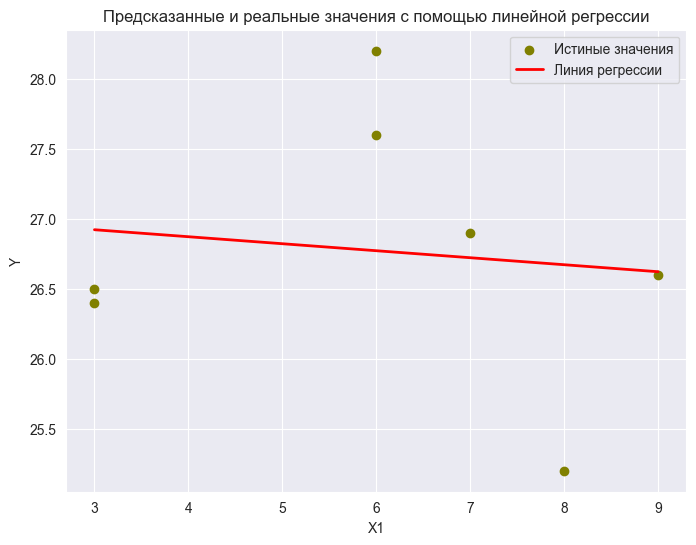

In [26]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.title("Предсказанные и реальные значения с помощью линейной регрессии")
plt.scatter(df_x1_y_predicted.X, df_x1_y_predicted.Actual, label="Истиные значения", color="olive")
plt.plot(df_x1_y_predicted.X, df_x1_y_predicted.Predicted, label="Линия регрессии", linewidth=2, color="red")
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.show()

По графику также видно, что график недостаточно точно отображает истинные значения. Некоторые точки находятся очень далеко от линии регрессии.

   X  Actual  Predicted  Difference
0  3 26.5000    26.9214     -0.4214
1  3 26.4000    26.9214     -0.5214
2  6 28.2000    26.7714      1.4286
3  6 27.6000    26.7714      0.8286
4  7 26.9000    26.7214      0.1786
5  8 25.2000    26.6714     -1.4714
6  9 26.6000    26.6214     -0.0214


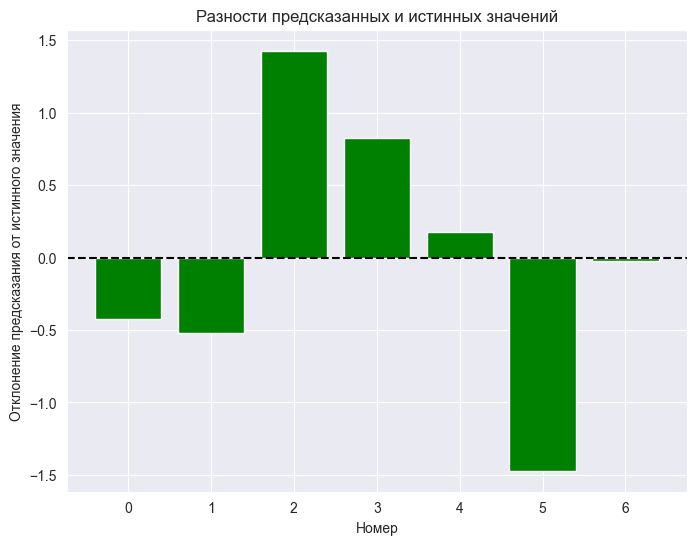

In [27]:
# Вычисление разницы
df_x1_y_predicted['Difference'] = (df_x1_y_predicted.Actual - df_x1_y_predicted.Predicted)
print(df_x1_y_predicted)


# Построение графика
plt.figure(figsize=(8, 6))
plt.bar(range(len(df_x1_y_predicted.Difference)), df_x1_y_predicted.Difference, color="green")
plt.title("Разности предсказанных и истинных значений")
plt.xlabel('Номер')
plt.ylabel('Отклонение предсказания от истинного значения')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

На графике видны отклонения больше, чем в 1 от реальных значений. Это достаточно большая ошибка. Далее будет построен график реальных значений против предсказанных.

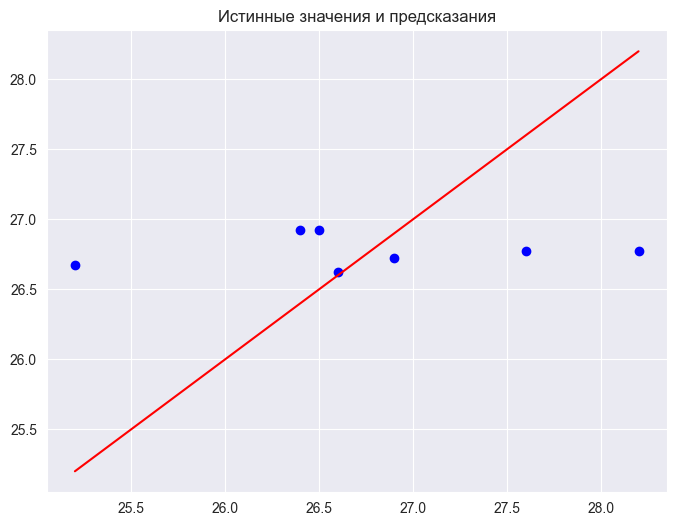

In [28]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.title("Истинные значения и предсказания")
plt.scatter(df_x1_y_predicted.Actual, df_x1_y_predicted.Predicted, label='Предсказанные значения', color='blue')
plt.plot([min(df_x1_y_predicted.Actual), max(df_x1_y_predicted.Actual)], [min(df_x1_y_predicted.Actual), max(df_x1_y_predicted.Actual)], color='red', label='Истинные значения')

plt.show()

Значения отходят от линии очень далеко и практически не следуют за ней. Это значит, что модель предсказывает значения только в общем и целом. Точность прогнозирования очень низкая.

## Часть 2 - Полиномиальная регрессия

Далее будет обучена модель полиномиальной регрессии, выполнено предсказание, получены метрики регрессии и выведен её график для регрессий 2 и 3 степени.

MAE: 3.556462585034011
R2: 0.9748477208279422


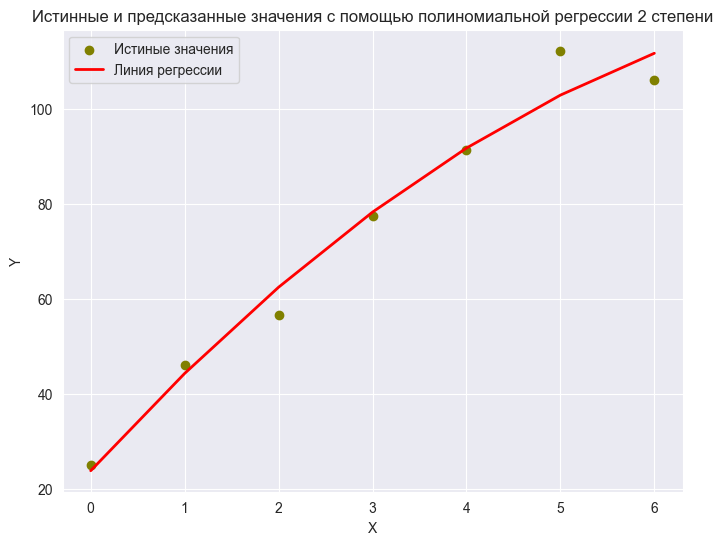

MAE: 3.1877551020408244
R2: 0.9853646505326167


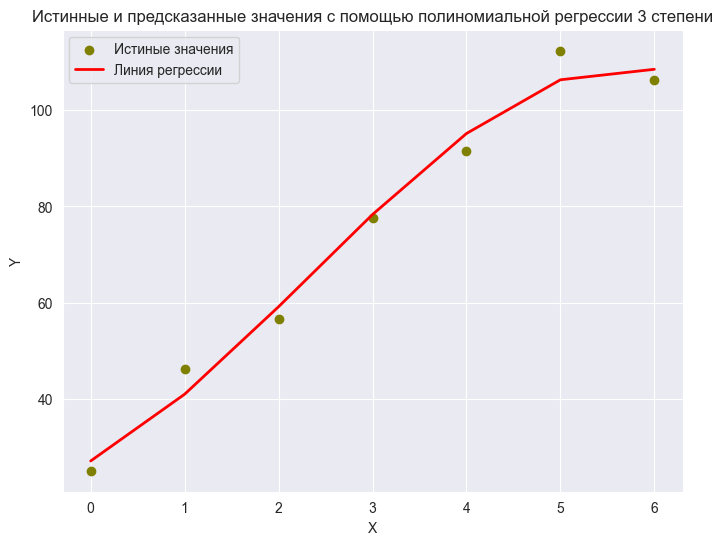

In [29]:
# Функция для полиномиальной регрессии
def make_regression_great_again(x: np.array, y: np.array, degree: int) -> None:
    
    # Создание полиномиальных значений
    poly_features: PolynomialFeatures = PolynomialFeatures(degree=degree)
    x_poly: np.ndarray[int] = poly_features.fit_transform(x)

    # Создание модели
    poly_linear_model: LinearRegression = LinearRegression()
    
    # Обучение модели полиномиальной регрессии
    poly_linear_model.fit(x_poly, y)
    
    # Предсказание
    y_poly: np.ndarray[float] = poly_linear_model.predict(x_poly)
    
    
    # Получение и вывод MAE и R2
    mae: float = mean_absolute_error(y, y_poly)
    r2: float = r2_score(y, y_poly)
    print(f"MAE: {mae}")
    print(f"R2: {r2}")
    
    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.title(f"Истинные и предсказанные значения с помощью полиномиальной регрессии {degree} степени")
    plt.scatter(x, y, label="Истиные значения", color="olive")
    plt.plot(x, y_poly, label="Линия регрессии", linewidth=2, color="red")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
    
new_x = np.array([int(x) for x in "0 1 2 3 4 5 6".split()]).reshape(-1, 1)
new_y: list[float] = list(map(float, "25.2 46.2 56.7 77.6 91.5 112.3 106.2".split()))
make_regression_great_again(new_x, new_y, 2)
make_regression_great_again(new_x, new_y, 3)


Данные виды регрессий объясняют значения намного лучше, чем линейная. Это не удивительно, потому что полиномиальная регрессия является расширенной версией линейной. Для этих данных этот метод отлично подходит и прекрасно описывает данные, понять это можно, если посмотреть на значения MAE и R2. Значение MAE около 3, для таких больших значений это значение ошибки очень хорошо. Также R^2 стремится к единице, это говорит о высокой точности предсказания. Также стоит заметить, что при повышении степени точность предсказания увеличиваться. Однако не стоит забывать, что степени полинома показывают не точность, а количество изломов, которые хотелось бы увидеть на графике. Поэтому степень нужно выбирать по форме распределения точек на графике. Например, на этом графике хорошо работала бы даже обыкновенная линейная регрессия, хотя вторая и третья степени также улучшают точность из-за неровности расположения точек.

## Часть 3 - Решение задачи регрессии различными методами

In [30]:
car_price = pd.read_csv("car_price.csv")
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,...,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,...,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,...,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,...,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,...,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,...,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,...,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [31]:
print("Дубликатов:", car_price.duplicated().sum())
print("Пропусков:", car_price.isna().sum().sum())
car_price.info()

Дубликатов: 0
Пропусков: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize       

Явных дубликатов и пропусков в данных нет, данные соответствуют типам. В таком случае можно предположить, что неявных дубликатов также нет, так как задание строится не на этом, а также это учебные данные.

В качестве целевой переменной была выбрана цена на автомобиль. Так как зачастую именно она является решающим фактором покупки или не покупки автомобиля.

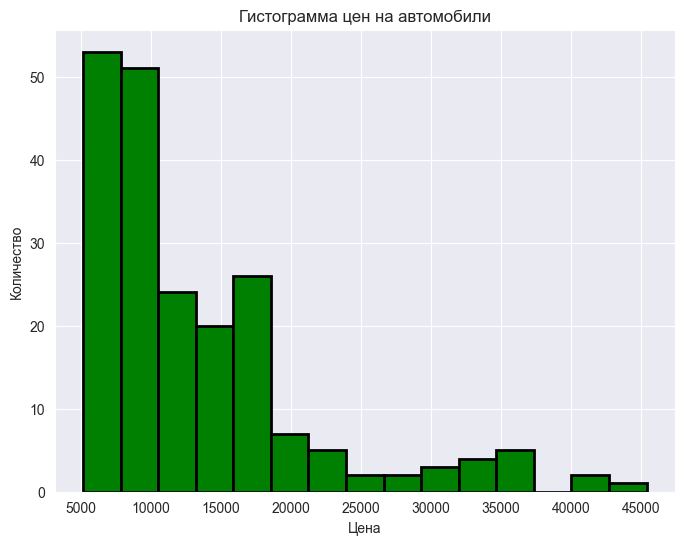

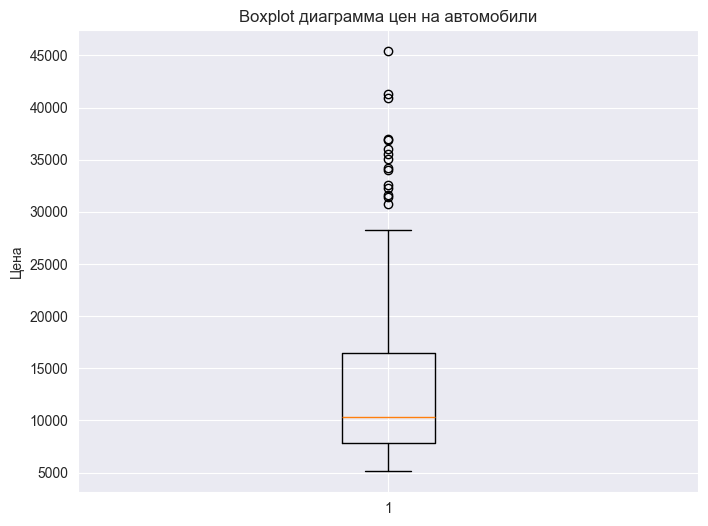

In [32]:
plt.figure(figsize=(8, 6))
plt.title("Гистограмма цен на автомобили")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.hist(car_price.price, color="green", edgecolor="black", linewidth=2, bins=15)
plt.show()

plt.figure(figsize=(8, 6))
plt.title("Boxplot диаграмма цен на автомобили")
plt.ylabel("Цена")
plt.boxplot(car_price.price)
plt.show()

По данным диаграммам заметно, что значительное количество значений смещено в сторону самых дешёвых. Следовательно, большинство автомобилей в выборке бюджетные. Построим матрицу диаграмм рассеяния.

<Figure size 600x600 with 0 Axes>

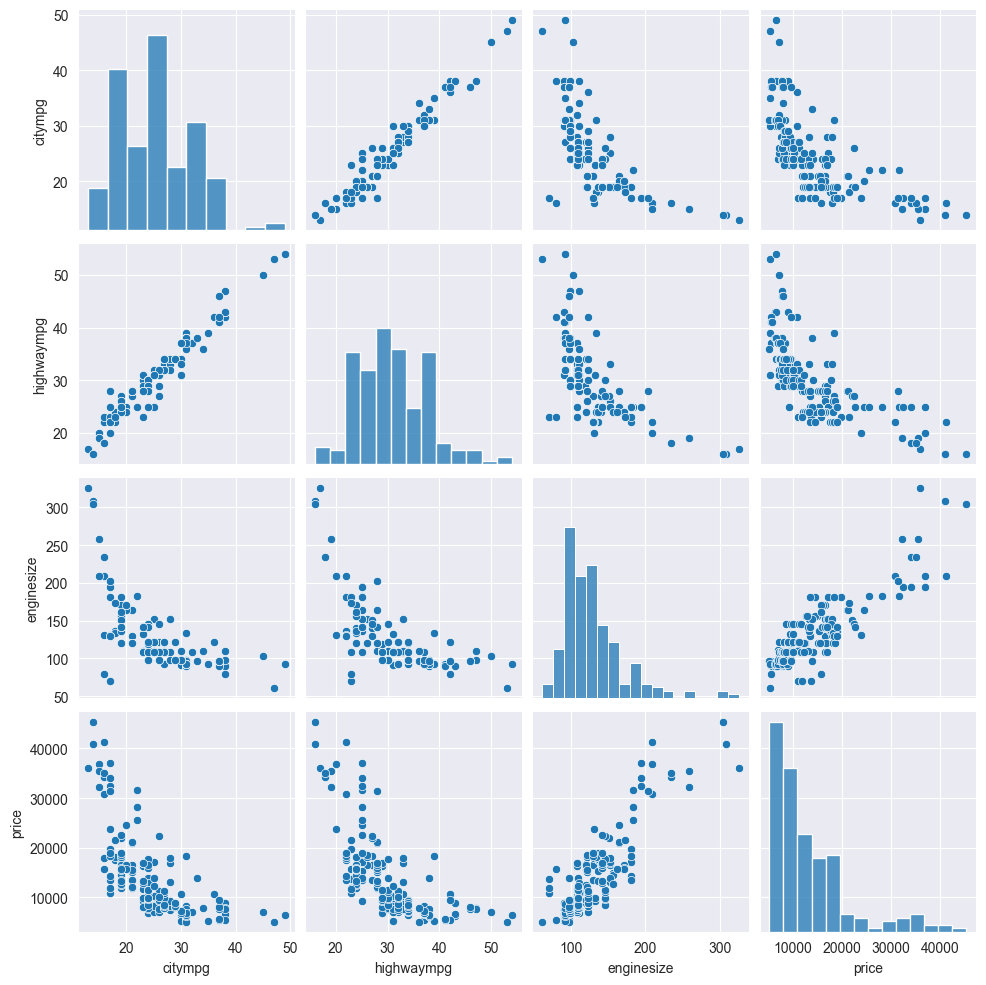

In [33]:
columns_research: list[str] = ["citympg", "highwaympg", "enginesize", "price"]

plt.figure(figsize=(6, 6))
sns.pairplot(car_price[columns_research])
plt.savefig('pairplot.png', format='png')
plt.show()

Между каждой из этих характеристик автомобиля имеется зависимость. Из полученной матрицы можно сделать вывод. Цена снижается от большого расхода по шоссе или городу, а также от низкого объёма двигателя. Второе происходит вследствие того, что на дешёвые автомобили обычно снабжают двигателями с низким объёмом, а дорогие - с большим. Также заметна зависимость между объёмом двигателя и расхода автомобиля. Всё это из-за того, что пробег на двигателе с большим объёмом значительно сильнее бьёт по карману.

Далее для исследования и разделения на валидационную и обучающую выборки были выбраны столбцы.

1. horsepower: Мощность в лошадиных силах
2. enginesize: объём двигателя
3. carlength: Длина машины
4. citympg: расход по городу
5. highwaympg: расход по шоссе

In [34]:
features = car_price[['horsepower', 'enginesize', 'carlength', 'citympg', 'highwaympg']]
target_values = car_price['price']
print(features.info())
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    int64  
 1   enginesize  205 non-null    int64  
 2   carlength   205 non-null    float64
 3   citympg     205 non-null    int64  
 4   highwaympg  205 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 8.1 KB
None


,horsepower,enginesize,carlength,citympg,highwaympg
0,111,130,168.8000,21,27
1,111,130,168.8000,21,27
2,154,152,171.2000,19,26
3,102,109,176.6000,24,30
4,115,136,176.6000,18,22
...,...,...,...,...,...
200,114,141,188.8000,23,28
201,160,141,188.8000,19,25
202,134,173,188.8000,18,23
203,106,145,188.8000,26,27


Данные были выбраны. Теперь приступим к резделению данных.

In [35]:
x_training, x_check, y_training, y_check = train_test_split(features, target_values, random_state=0, test_size=0.25)

print(x_training.shape)
print(y_training.shape)
print(x_check.shape)
print(y_check.shape)

(153, 5)
(153,)
(52, 5)
(52,)


Данные были разделены на тренировочные и валидационные в пропорции 75/25. 

Далее данные будут нормализованы с помощью StandardScaler. Обратите внимание, что y не нормализуют, потому что целевая переменная может быть в разных единицах (например, цена в долларах, килограммах, времени и т.д.), и изменение её масштаба может исказить интерпретацию модели.

In [36]:
scaler = StandardScaler()

x_training_scaled = scaler.fit_transform(x_training)
x_checking_scaled = scaler.transform(x_check)

Данные были нормализованы, далее будет проведено обучение модели линейной регрессии.

In [37]:
CarLinearModel: LinearRegression = LinearRegression()
CarLinearModel.fit(x_training_scaled, y_training)

LinearRegression()

Далее будет проведена проверка точности прогнозирования модели не менее, чем по 4 метрикам.

In [38]:
y_predicted = CarLinearModel.predict(x_checking_scaled)
mae: float = mean_absolute_error(y_check, y_predicted)
mse: np.float64 = mean_squared_error(y_check, y_predicted)
rmse: np.float64 = np.float64(sqrt(mse))
r2: np.float64 = r2_score(y_check, y_predicted)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(max(target_values), sum(target_values)/len(target_values))

MAE: 2773.66349664483
MSE: 13685489.245559562
RMSE: 3699.3903883693542
R2: 0.816469740345569
45400.0 13276.710570731706


Данные метрики показывают, что в этот раз модель работает достаточно хорошо. При предсказании цены модель ошибается в среднем для каждого автомобиля на 2773, при квадратичном подходе модель ошибается на 3699, что при максимальной цене автомобиля в 45400 и средней в 13276 является хорошим показателем. Также значение R^2 говорит нам о том, что модель объясняет около 81% всех данных, что является также высоким показателем. Модель имеет такие характеристики, так как была обучена на достаточно большом объёме данных.

Далее будет создан датафрейм с истинными и предсказанными значениями.

In [39]:
car_df: pd.DataFrame = pd.DataFrame({"Истинные": target_values, "Предсказанные": CarLinearModel.predict(scaler.transform(features))}).reset_index(drop=True)
car_df

,Истинные,Предсказанные
0,13495.0000,13288.6118
1,16500.0000,13288.6118
2,16500.0000,18421.0954
3,13950.0000,11591.9111
4,17450.0000,14912.2677
...,...,...
200,16845.0000,16624.5323
201,19045.0000,19650.2404
202,21485.0000,20861.2404
203,22470.0000,16554.2358


Истинные и предсказанные значения по всему датафрему были помещены в новый датафрейм. Далее будет выполнено получение датафрейма с коэффициентами.

In [40]:
# Извлечение коэффициентов
coefficients = CarLinearModel.coef_

# Создание датафрейма с признаками и коэффициентами
coeff_df = pd.DataFrame({
    'Признак': features.columns,
    'Коэффициент': coefficients
}).sort_values(by="Коэффициент", ascending=False).reset_index(drop=True)
coeff_df

,Признак,Коэффициент
0,enginesize,3809.9696
1,horsepower,2573.9870
2,carlength,1252.5149
3,citympg,173.8985
4,highwaympg,-97.2016


Данные коэффициенты нам говорят о том, что самыми важными признаками при формировании цены из представленных является объём двигателя и его мощность. За ними следует длина автомобиля. Наименее влияющим на цену в положительную сторону является расход топлива в городе и отрицательно на рост цены влияет расход топлива на шоссе.

Это можно объяснить тем, что для повышения мощности двигателя можно увеличить его объём, таким образом мощность двигателя и его объём влияют больше всего, так как значительно увеличивают расход топлива. Поэтому их ставят в дорогие автомобили для богатых. Длина автомобиля также является признаком премиальности автомобиля, а также увеличивает его цену за счёт большего расхода материалов на его создание. В свою очередь увеличение расхода в городе практически не влечёт повышения цены автомобиля, потому что на него придётся много тратить, но всё равно имеет положительный показатель из-за того, что премиальные автомобили с мощными двигателями имеют большой расход. А увеличение расхода на трассе вовсе удешевляет автомобиль по понятным причинам. Далее полученные данные будут выведены на график.

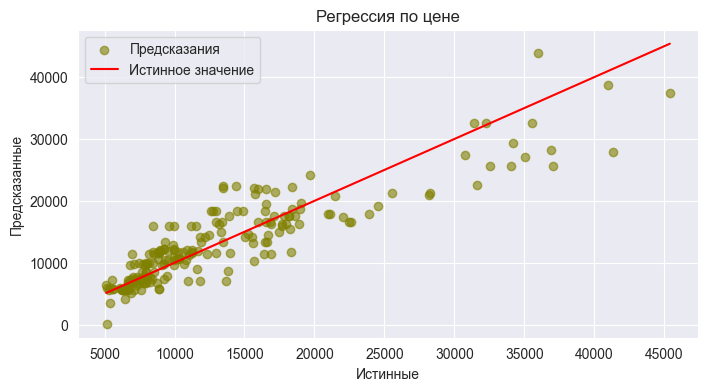

In [41]:
plt.figure(figsize=(8, 4))
plt.scatter(car_df["Истинные"], car_df["Предсказанные"], alpha=0.6, color='olive', label='Предсказания')
plt.plot([car_df["Истинные"].min(), car_df["Истинные"].max()], [car_df["Истинные"].min(), car_df["Истинные"].max()], color='red', linestyle='-', label='Истинное значение')
plt.xlabel('Истинные')
plt.ylabel('Предсказанные')
plt.title('Регрессия по цене')
plt.legend()
plt.grid(True)
plt.show()

Данный график снова указывает на точность регрессии. Предсказанные значения довольно близко находятся к истинным значениям по заданным параметрам.

## Для получения оценки 5
Реализация регрессии методом k-ближайших соседей или деревом решений

In [42]:
# Будут проведены необходимые действия для работы с данными заново, чтобы не запутаться.
# Разделение данных на признаки (X) и целевую переменную (y) 
X = car_price[['horsepower', 'enginesize', 'carlength', 'citympg', 'highwaympg']]
y = car_price['price']

# Разделение на обучающие и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели KNN (k=2 - число ближайших соседей)
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)

# Прогнозирование на тестовых данных
y_pred = knn_model.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 1698.125
MSE: 7048818.216346154
RMSE: 2654.9610574067096
R2: 0.9054713050961885


Эти значения были получены при линейной регрессии:

1. MAE: 2773.6634966448287
2. MSE: 13685489.245559555
3. RMSE: 3699.3903883693533
4. R2: 0.816469740345569

Можно заметить, что MAE, MSE и RMSE меньше у регрессии k-соседей, а R2 наоборот больше. Это означает, что данные регрессия методом k-соседей более точна и допускает меньше ошибок, чем линейная. Далее полученные данные будут визуализированы на графике.

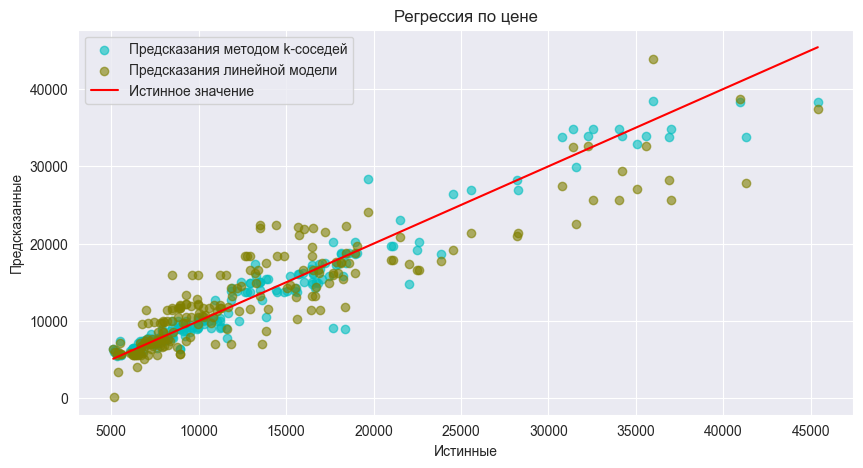

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(car_df["Истинные"], knn_model.predict(scaler.transform(features)), alpha=0.6, color='c', label='Предсказания методом k-соседей')
plt.scatter(car_df["Истинные"], car_df["Предсказанные"], alpha=0.6, color='olive', label='Предсказания линейной модели')
plt.plot([car_df["Истинные"].min(), car_df["Истинные"].max()], [car_df["Истинные"].min(), car_df["Истинные"].max()], color='red', label='Истинное значение')
plt.xlabel('Истинные')
plt.ylabel('Предсказанные')
plt.title('Регрессия по цене')
plt.legend()
plt.grid(True)
plt.show()

Этот график также подтверждает, что метод k-соседей при значении 5 более эффективен, чем метод линейной регрессии. Нередко предсказанные значения находятся почти на линии реальных значений, также большинство предсказанных значений лежит значительно ближе к оси истинных значений, чем предсказание линейной регрессии. Однако метод k-соседей также имеет и недостатки по отношению к линейной регрессии: метод k-соседей теряет эффективность при высокой размерности, необходима правильно выбирать параметр k, который значительно влияет на производительность и точность регрессии, а также модель теряет эффективность при высоком значении k. В нашём случае значительно лучше подходит регрессия методом k-соседей, при этом k = 2, однако при увеличении размерности стоило бы перейти на линейную регрессию из-за снижения эффективности. Также модель k-соседей было бы лучше использовать и при нелинейности распределения данных, так как линейная регрессия лучше работает с линейными данными. То есть, использование одной из данных моделей целесообразно в зависимости от конкретного случая.

## Вывод

Выполненная работа охватывает несколько аспектов задачи регрессии на различных этапах. На первом этапе была проведена простая линейная регрессия, где использовались значения x1 и y. В процессе обучения модели была создана таблица с истинными и предсказанными значениями, а также вычислены метрики качества модели, такие как MSE, RMSE, MAE и R². На основе этих показателей было сделано заключение о низкой точности модели, так как значения ошибок оказались достаточно высокими, а коэффициент детерминации близким к нулю. Для улучшения результатов можно рассматривать другие модели.

Во втором этапе была выполнена полиномиальная регрессия с использованием различных степеней полинома. Результаты показали, что полиномиальная регрессия с более высокими степенями значительно улучшает точность предсказаний по сравнению с линейной регрессией, что продемонстрировано через снижение значения MAE и увеличение R². Однако выбор степени полинома должен зависеть от распределения данных, так как слишком высокая степень может привести к переобучению.

На третьем этапе была использована модель регрессии для предсказания цен на автомобили. В процессе были исследованы данные, выбрана целевая переменная (цена автомобиля), выполнены визуализации (гистограммы, boxplot) и построена матрица диаграмм рассеяния. Также данные были разделены на обучающую и валидационную выборки, нормализованы и использованы для обучения модели линейной регрессии. Метрики качества модели были вычислены, и на основе полученных результатов сделаны выводы о возможных способах улучшения точности предсказаний.

В конце было выполнено задание на 5. Метод k-соседей оказался эффективным инструментом для предсказания цен на автомобили, однако для улучшения производительности при работе с большими наборами данных можно было бы рассмотреть использование более сложных методов или оптимизацию гиперпараметров модели.

# Дополнительное задание на 4
## Доп задание 9
Выполнить L1-регуляризацию (Lasso). Сравнить результаты, полученные другими методами. Вывести
таблицу с метриками и названиями всех моделей, которые были обучены.

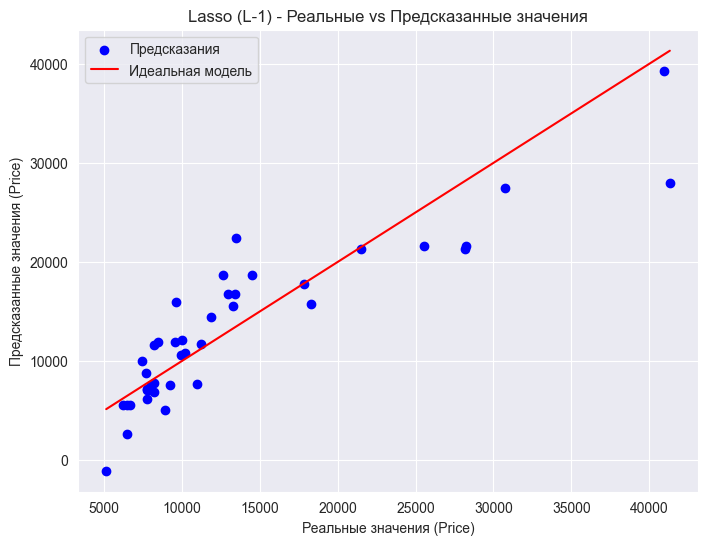

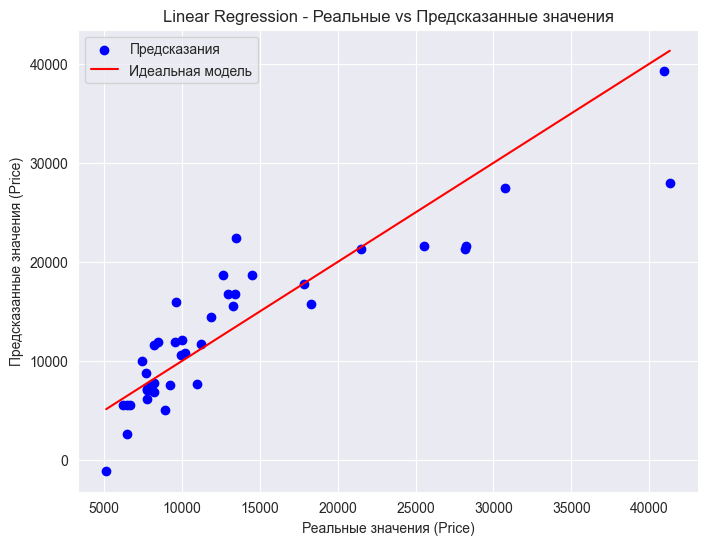

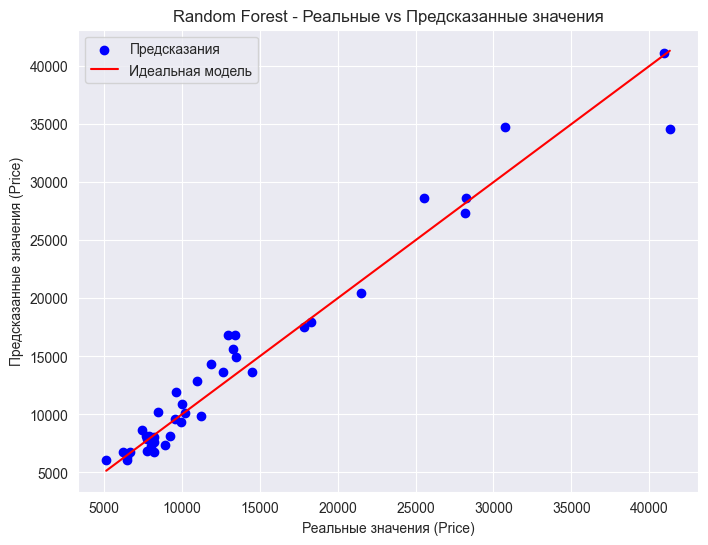

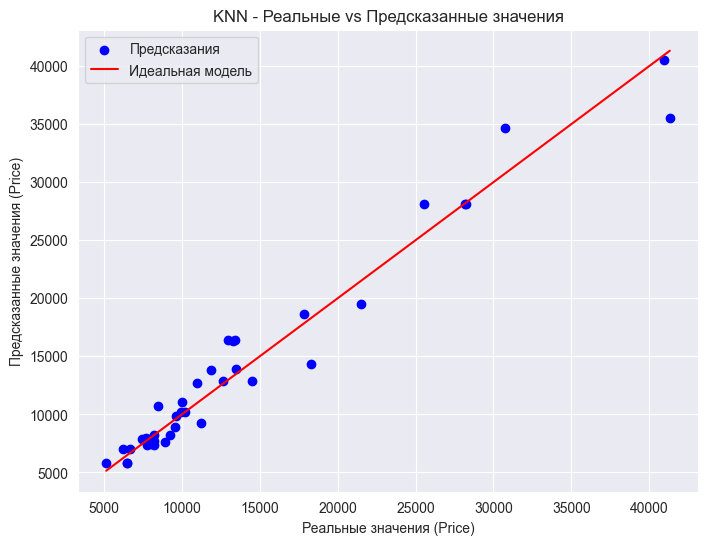

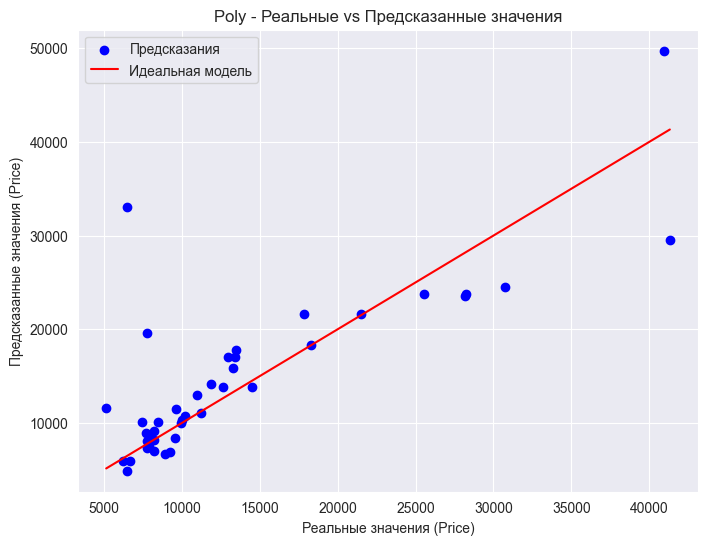

,Model,MSE,RMSE,MAE,R²
0,Lasso (L-1),15812571.0014,3976.5024,2930.9675,0.7997
1,Linear Regression,15812649.6764,3976.5123,2930.9765,0.7997
2,Random Forest,3411198.3974,1846.9430,1264.4168,0.9568
3,KNN,3259667.1026,1805.4548,1235.2581,0.9587
4,Poly,31741353.0542,5633.9465,3122.2729,0.5979


In [44]:
# Датасет
X = car_price[['horsepower', 'enginesize', 'carlength', 'citympg', 'highwaympg']]
y = car_price['price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание моделей и быстрое помещение их в словарь
models = {
    'Lasso (L-1)': Lasso(alpha=0.1),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'KNN': KNeighborsRegressor(n_neighbors=2),
    'Poly': make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

# Список для хранения результатов
results = []

# Обучение моделей и вычисление метрик
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Сохранение результатов
    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Идеальная модель')
    plt.title(f'{model_name} - Реальные vs Предсказанные значения')
    plt.xlabel('Реальные значения (Price)')
    plt.ylabel('Предсказанные значения (Price)')
    plt.legend()
    plt.show()

# Ограничение на отображение чисел в научном формате
pd.set_option('display.float_format', '{:.4f}'.format)
# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Вывод таблицы с результатами
results_df

Для выполнения задания специально было обучено 5 моделей: Lasso, Linear Regression, Random Forrest, KNN и Poly по пяти признакам, указанным на 6 строке блока с кодом выше. Это было сделано специально, так как зачастую в практике несколько факторов влияет на исследуемый. Метрики, полученные от моделей указаны в таблице.

Модель KNN располагается на первом месте в рейтинге, потому что она демонстрирует наилучший показатель R² (0.9587), что свидетельствует о высоком качестве предсказаний и способности модели объяснять большую часть вариации данных. Кроме того, её значения MSE (3259667.1026), RMSE (1805.4548) и MAE (1235.2581) также значительно ниже, чем у других моделей, что подтверждает её эффективность.

На втором месте находится модель Random Forest, с R² 0.9559, что немного хуже, чем у KNN, но всё равно очень хороший результат. Она также показывает хорошие показатели по MSE (3485111.1060), RMSE (1866.8452) и MAE (1303.0352), что делает её одним из лидеров среди всех представленных моделей.

Модель Linear Regression располагается на третьем месте. Несмотря на схожее значение R² с Lasso (0.7997), её MSE (15812649.6764), RMSE (3976.5123) и MAE (2930.9765) значительно хуже, что говорит о том, что линейная регрессия менее точна в предсказаниях по сравнению с более сложными моделями, такими как KNN и Random Forest.

Модель Lasso (L-1) находится на четвёртом месте, поскольку её результаты идентичны линейной регрессии (R² 0.7997), однако её способность к оптимизации и регуляризации ограничена, что не позволяет достичь более высоких значений.

На последнем месте — модель Poly, с самым низким значением R² (0.4942), что говорит о том, что она объясняет лишь половину вариации данных и демонстрирует наихудшие результаты по всем метрикам: MSE (39930196.5797), RMSE (6319.0345) и MAE (3774.6565). Это делает её наименее подходящей для задач предсказания в этом наборе.

Таким образом, для данного набора данных модель Lasso (L-1) демонстрирует относительно среднюю точность предсказания.